In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Set paths
dataset_path = '/content/drive/MyDrive/PlantDisease/rice'  # Adjust if needed
model_save_path = '/content/drive/MyDrive/savedModels/rice_disease_model.h5'

# STEP 3: Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# STEP 4: Prepare data generators
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# STEP 5: Load MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze base

# STEP 6: Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# STEP 7: Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 8: Train model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

# STEP 9: Save trained model
model.save(model_save_path)
print("✅ Rice disease model saved at:", model_save_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2106 images belonging to 6 classes.
Found 522 images belonging to 6 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 869s 13s/step - accuracy: 0.1903 - loss: 2.1742 - val_accuracy: 0.3525 - val_loss: 1.6511
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.3132 - loss: 1.6615 - val_accuracy: 0.5536 - val_loss: 1.3614
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.4476 - loss: 1.4149 - val_accuracy: 0.6322 - val_loss: 1.1788
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.5457 - loss: 1.2114 - val_accuracy: 0.6609 - val_loss: 1.0593
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.6119 - loss: 1.0437 - val_accuracy: 0.6839 - val_loss: 0.9751
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6737 - loss: 0.9470 - val_accuracy: 0.7050 - val_loss: 0.8935
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6486 - loss: 0.9252 - val_accuracy: 0.7107 - val_loss: 0.8623
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.7099 - loss: 0.8103 - val_accuracy: 0.7241 - 

✅ Rice disease model saved at: /content/drive/MyDrive/savedModels/rice_disease_model.h5


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving images (14).jpeg to images (14).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🌾 Predicted Disease: brown_spot
✅ Confidence: 43.59%
💡 Fertilizer Suggestion: 🌿 Apply fungicides such as Mancozeb or Carbendazim. Maintain balanced fertilization and remove infected debris.


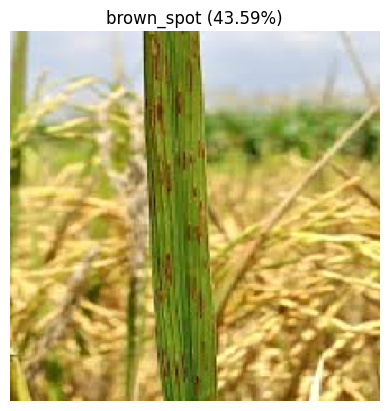

In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Upload a custom image for prediction
from google.colab import files
uploaded = files.upload()

import os
image_path = list(uploaded.keys())[0]  # Name of the uploaded image

# STEP 3: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# STEP 4: Load the trained rice model
model = load_model('/content/drive/MyDrive/savedModels/rice_disease_model.h5')  # ✅ Update path if saved elsewhere

# STEP 5: Preprocess the uploaded image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# STEP 6: Predict the disease class
pred = model.predict(img_array)
class_index = np.argmax(pred[0])
confidence = np.max(pred[0]) * 100

# STEP 7: Class labels and fertilizer suggestions
class_labels = ['bacterial_leaf_blight','brown_spot','healthy','leaf_blast','leaf_scald','narrow_brown_spot']  # 🔁 Edit if you have different classes

fertilizer_suggestions = {
    'bacterial_leaf_blight': '💊 Use copper-based bactericides like copper oxychloride. Avoid excessive nitrogen and water stagnation. Ensure proper drainage.',
    'brown_spot': '🌿 Apply fungicides such as Mancozeb or Carbendazim. Maintain balanced fertilization and remove infected debris.',
    'healthy': '✅ No disease detected. Use a balanced fertilizer like NPK 20-20-20 to promote healthy growth.',
    'leaf_blast': '🔥 Apply fungicides like Tricyclazole. Avoid excess nitrogen. Maintain field sanitation and proper spacing.',
    'leaf_scald': '🌬 Use fungicides such as Tricyclazole or Propiconazole. Improve air circulation and avoid water stress.',
    'narrow_brown_spot': '🧪 Apply fungicides like Azoxystrobin or Mancozeb. Improve potassium nutrition and avoid excessive nitrogen.'
}

# STEP 8: Output the prediction and fertilizer suggestion
predicted_label = class_labels[class_index]
suggestion = fertilizer_suggestions[predicted_label]

print(f"🌾 Predicted Disease: {predicted_label}")
print(f"✅ Confidence: {confidence:.2f}%")
print(f"💡 Fertilizer Suggestion: {suggestion}")

# STEP 9: Display the uploaded image
plt.imshow(img)
plt.axis('off')
plt.title(f"{predicted_label} ({confidence:.2f}%)")
plt.show()
